# (Statistical) Data Types



<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/05a-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Categorical (Discrete) Variables
- Discrete categories or classes

In [56]:
np.random.seed(1990)

In [ ]:
# string categories
cities = ["provo", "orem", "san francisco"]
cities_sample = np.random.choice(cities,p=[.5, .4, .1], size=10) # multiclass
print(cities_sample)

In [58]:
sex = ["male", "female"] # binary
sex_sample = np.random.choice(sex, size=100, p=[0.3, 0.7])

In [ ]:
sex_sample

In [60]:
# Add a one-hot encoding example of cities
one_hot = np.zeros((10, len(cities)))
for i, city in enumerate(cities_sample):
    one_hot[i, cities.index(city)] = 1

In [ ]:
print(one_hot)

In [ ]:
df_cities = pd.DataFrame(cities_sample, columns=['city'])

# Perform one-hot encoding using pandas
one_hot_encoded_df = pd.get_dummies(df_cities, columns=['city'])


one_hot_encoded_df


In [ ]:
# numerical categories
np.random.randint(0, 5, 10)

### Quantitative (Continuous) Variables
- Typically real-valued numbers

In [ ]:
np.random.multivariate_normal(np.zeros(3), np.eye(3), 10)

### Ordinal Variables
- A variable that captures relative ranking of data
- Allow us to say which has less and which has more
- Difficult to say by "how much"


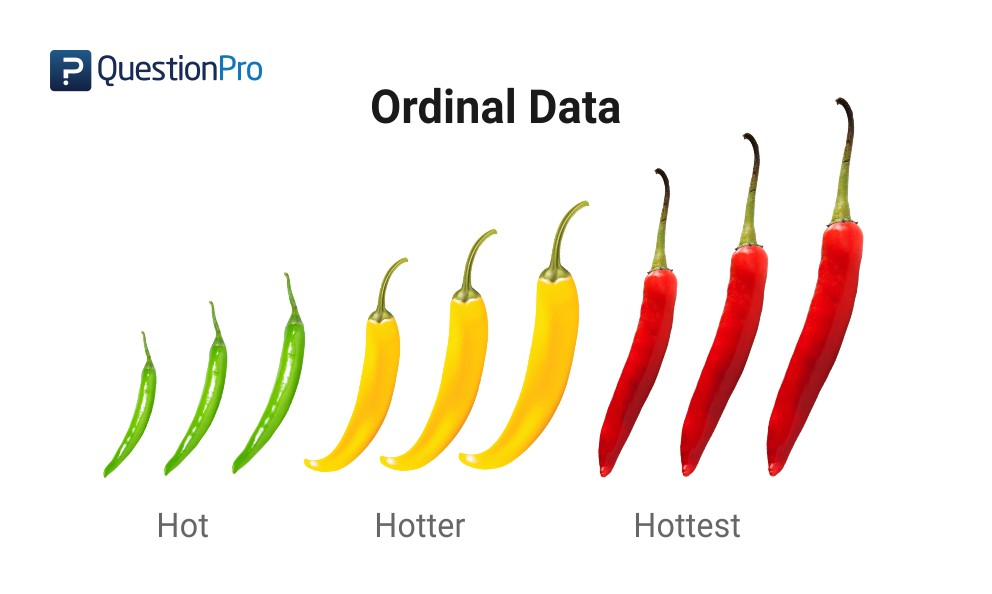

In [ ]:
scale= ["mild", "hot", "hotter", "hottest"]
np.random.choice(scale, size=100)

In [ ]:
# Mapping to numerical values using Pandas
df = pd.DataFrame(np.random.choice(scale, size=100), columns=['temperature'])
df['temperature'] = df['temperature'].map({'mild': 0, 'hot': 1, 'hotter': 2, 'hottest': 3})
df

# Exploratory Data Analysis (EDA) Continuous Data:
- Plots and statistics
- Univariate
- Multivariate

In [66]:
x = np.random.normal(0, 3, 1000) # creates a normal distribution with mean 0 and std 3 and sample size 1000
y = np.random.normal(10, 1, 1000) # creates a normal distribution with mean 10 and std 1 and sample size 1000

### Univariate Plots and Statistics

### Central Tendency
- key question: what is a distribution?

In [ ]:
plt.hist(x, alpha=.5, label='x') # plot a histogram of array x
plt.hist(y, alpha=.5, label='y')
plt.legend()
plt.show()

#### Mean
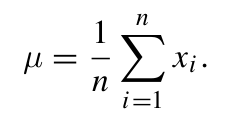

In [ ]:
# mean
mean_x = np.mean(x)
print(mean_x)

In [ ]:
mean_y = np.mean(y)
print(mean_y)

#### Median

In [70]:
# median
median_x = np.median(x)

In [71]:
median_y = np.median(y)

In [ ]:
plt.hist(x, alpha=.5, label='x') # plot a histogram of array x
plt.hist(y, alpha=.5, label='y')

# Add vertical lines for the mean and median of x
plt.axvline(np.mean(x), color='blue', linestyle='dashed', linewidth=1, label='Mean of x')
plt.axvline(np.median(x), color='blue', linestyle='solid', linewidth=1, label='Median of x')

# Add vertical lines for the mean and median of y
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=1, label='Mean of y')
plt.axvline(np.median(y), color='red', linestyle='solid', linewidth=1, label='Median of y')

plt.legend()
plt.show()

### Spread (Variability)

#### Variance
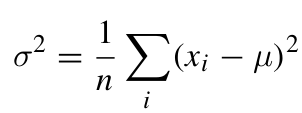

In [ ]:
# Variance by hand
np.mean(np.power(x - mean_x, 2))

In [ ]:
# Variance using numpy
np.var(x)

#### Standard Deviation

Standard Deviation = $\sqrt{\text{Variance}}$

### Outliers

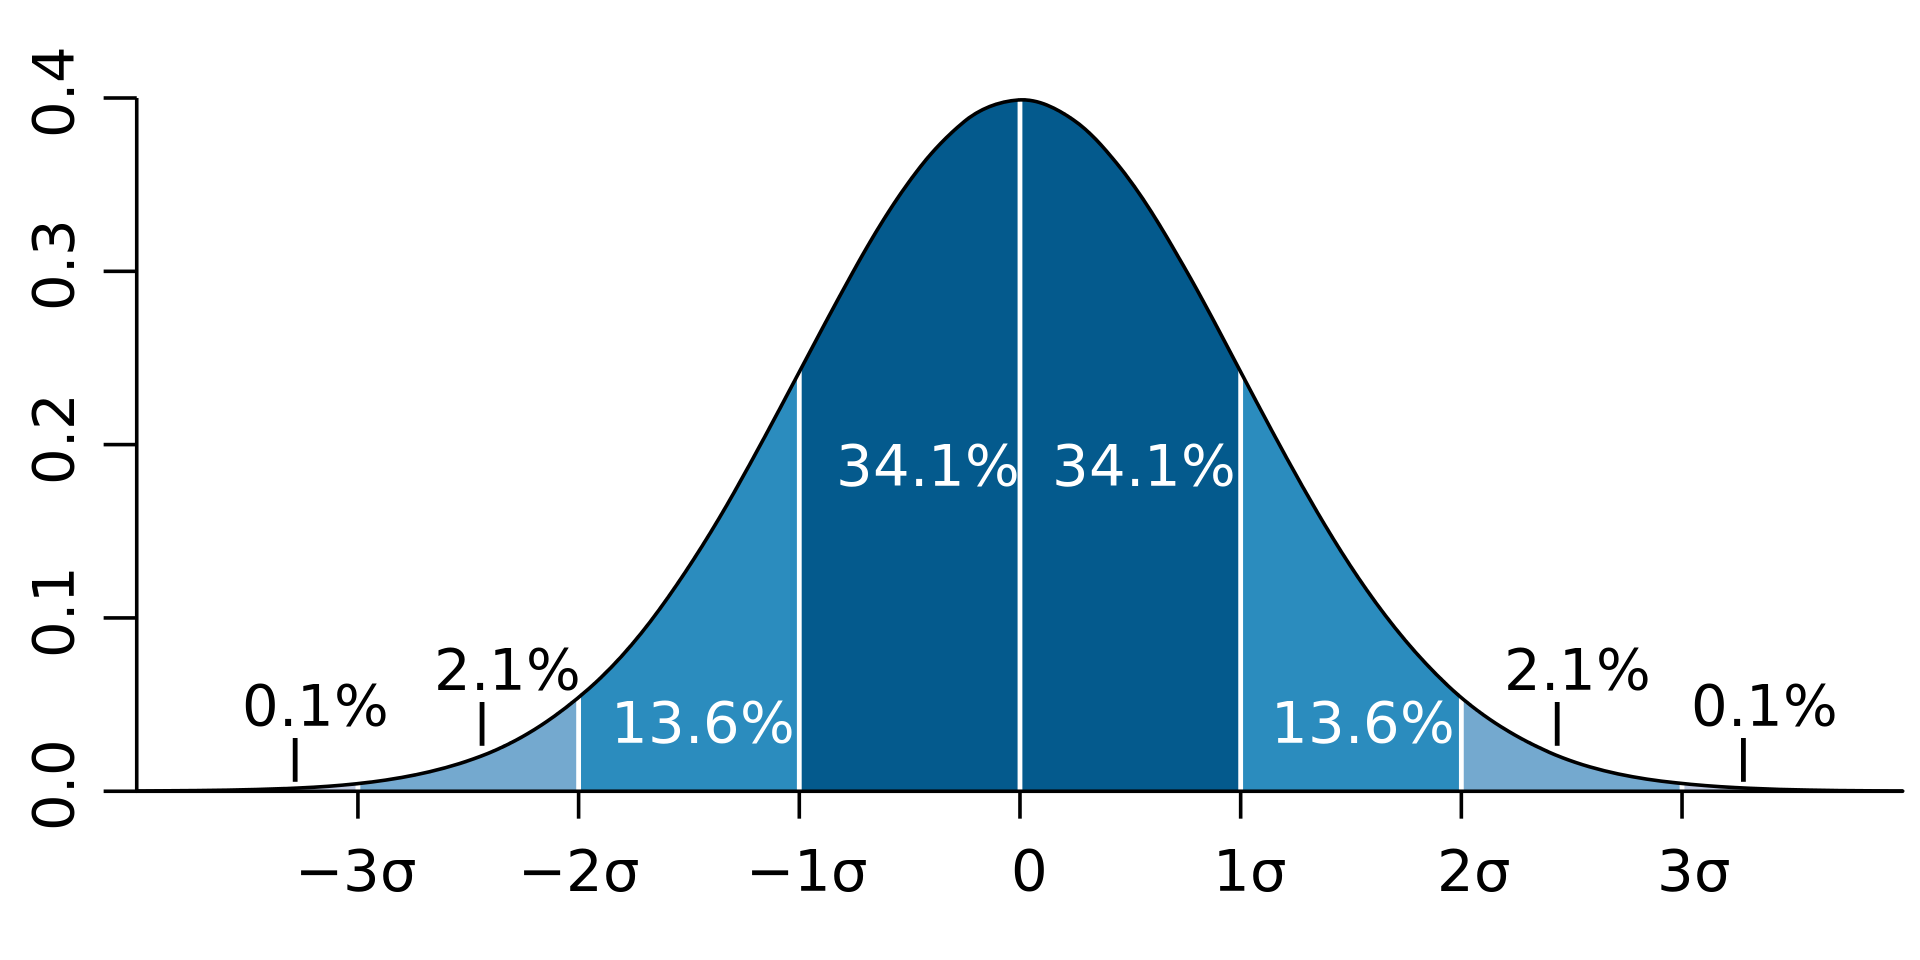

**68–95–99.7 rule**

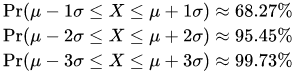

In [75]:
x = np.random.normal(100, 20, 1000) # create a normal distribution with mean 100 and std 20 and sample size 1000

In [ ]:
plt.hist(x)
plt.show()

In [77]:
z_scores = (x - x.mean()) / x.std()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
mean_x = np.mean(x)
std_x = np.std(x)

# Add mean +- stdev
axes[0].axvline(mean_x, color='r', linestyle='dashed', linewidth=1)
axes[0].axvline(mean_x + std_x, color='orange', linestyle='dashed', linewidth=1)
axes[0].axvline(mean_x - std_x, color='orange', linestyle='dashed', linewidth=1)
axes[0].hist(x)
axes[0].title.set_text('Original Data')

axes[1].axvline(0, color='r', linestyle='dashed', linewidth=1)
axes[1].axvline(1, color='orange', linestyle='dashed', linewidth=1)
axes[1].axvline(-1, color='orange', linestyle='dashed', linewidth=1)
axes[1].hist(z_scores)
axes[1].title.set_text('Z-Score Data')

In [79]:
keep = np.where((z_scores > -2.0) & (z_scores < 2.0))

In [ ]:
len(x)

In [ ]:
len(keep[0])

In [ ]:
print(len(keep[0])/len(x))

In [ ]:
plt.hist(x[keep])
plt.show()

In [149]:
x = np.random.normal(2, 1, size=1000)
y = np.random.gamma(4, 2, size=1000)

#### Kernel Density Estimation (KDE)

In [ ]:
sns.kdeplot(x=x, fill=True)
sns.kdeplot(x=y, fill=True)

In [ ]:
sns.kdeplot(x=x, fill=True)
sns.kdeplot(x=y, fill=True)

# Add vertical lines for the mean and median of x
plt.axvline(np.mean(x), color='blue', linestyle='dashed', linewidth=1, label='Mean of x')
plt.axvline(np.median(x), color='blue', linestyle='solid', linewidth=1, label='Median of x')

# Add vertical lines for the mean and median of y
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=1, label='Mean of y')
plt.axvline(np.median(y), color='red', linestyle='solid', linewidth=1, label='Median of y')

plt.legend()

## Bi-variate (multi-variate) statistics

#### Scatter Plots

In [88]:
x = np.arange(0, 50)
y = 2.5*x + 10 + np.random.normal(0, 10, len(x))

In [ ]:
plt.scatter(x, y)

#### Correlation Coefficents

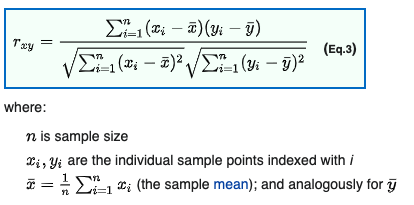

- A measure of linear correlation between two sets of data
- It is the ratio between the covariance of two variables and the product of their standard deviations
- it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1
- As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.

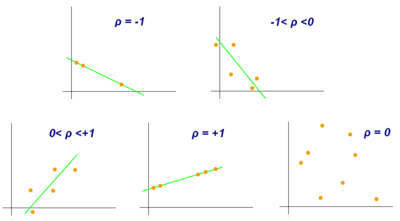

In [ ]:
np.corrcoef(x, y)

In [ ]:
np.corrcoef(x, y)[0][1]

In [ ]:
X = np.random.multivariate_normal(np.zeros(3), np.eye(3), size=100)

# Create a covariance matrix with some correlations for Y
cov_matrix_Y = np.array([[1, 0.9, 0.5],
                         [0.9, 1, 0.3],
                         [0.5, 0.3, 1]])
Y = np.random.multivariate_normal(np.zeros(3), cov_matrix_Y, size=100)

![Bivaiate Normal](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/1100px-MultivariateNormal.png)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=X[:,0], y=X[:,1], ax=axes[0])
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Scatter plot of X')

sns.scatterplot(x=Y[:,0], y=Y[:,1], ax=axes[1])
axes[1].set_xlabel('Y1')
axes[1].set_ylabel('Y2')
axes[1].set_title('Scatter plot of Y')

plt.show()

In [125]:
rho_X = np.corrcoef(X.T)
rho_Y = np.corrcoef(Y.T)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rho_X, ax=axes[0])
axes[0].set_title('Correlation Matrix of X')

sns.heatmap(rho_Y, ax=axes[1])
axes[1].set_title('Correlation Matrix of Y')

plt.show()

#### R^2 (R squared)

- The **coefficient of determination**, denoted R2 or r2 and pronounced "R squared"
- the proportion of the variation in the dependent variable that is predictable from the independent variable

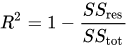

Total Sum of Squares (proportial to the variance of the data):



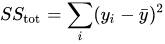

Global Mean of the data:

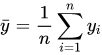

Sum of squares of the Residuals:

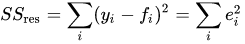

**Interpretation**: Suppose R2 = 0.49. This implies that 49% of the variability of the dependent variable in the data set has been accounted for, and the remaining 51% of the variability is still unaccounted for. For regression models, the regression sum of squares, also called the explained sum of squares, is defined as

In [ ]:
sns.regplot(x=x,y=y)
plt.show()

### Case Study

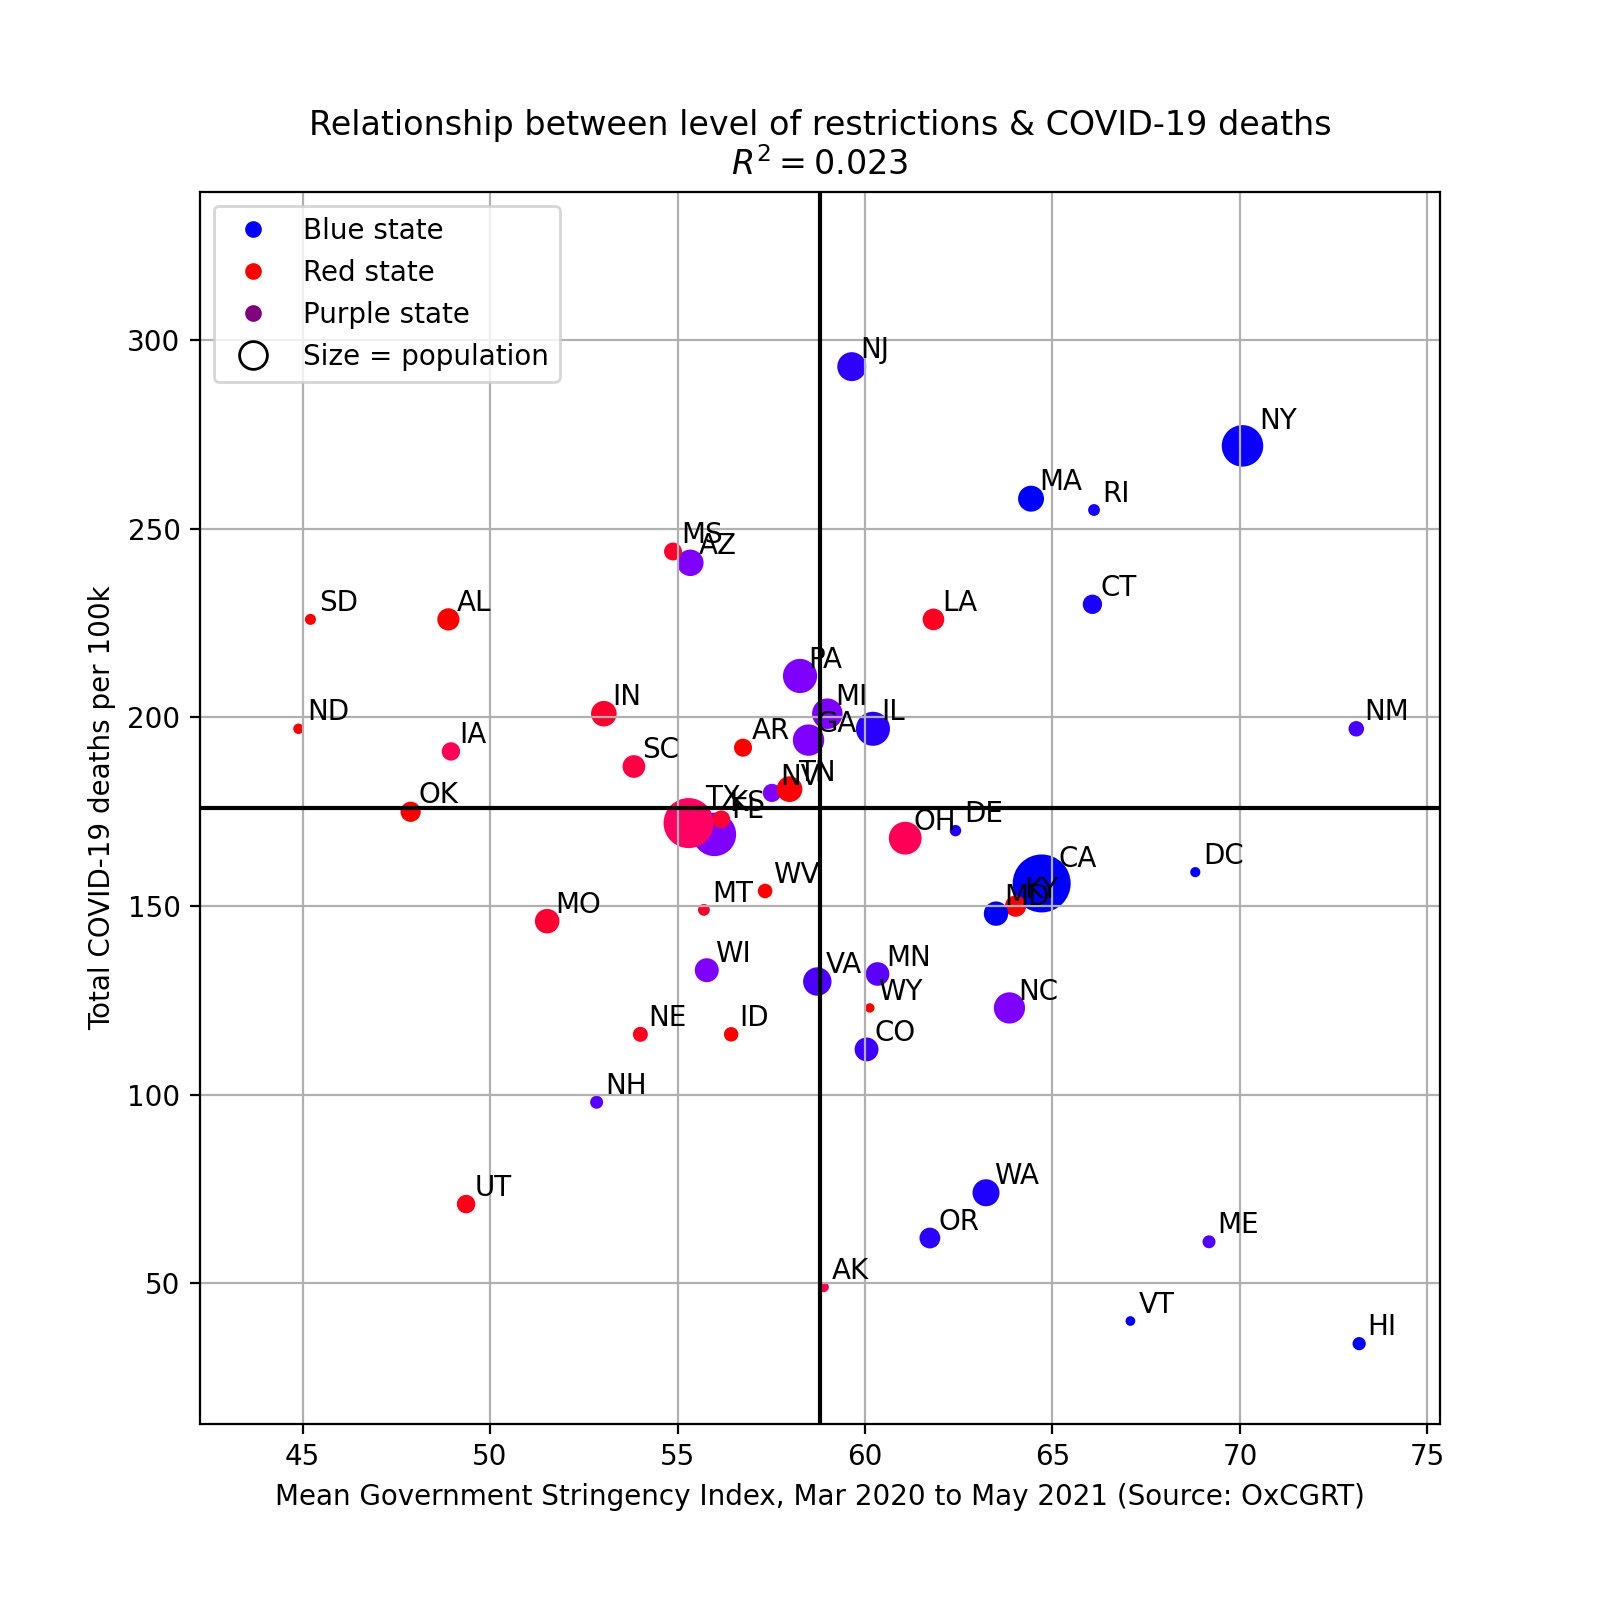

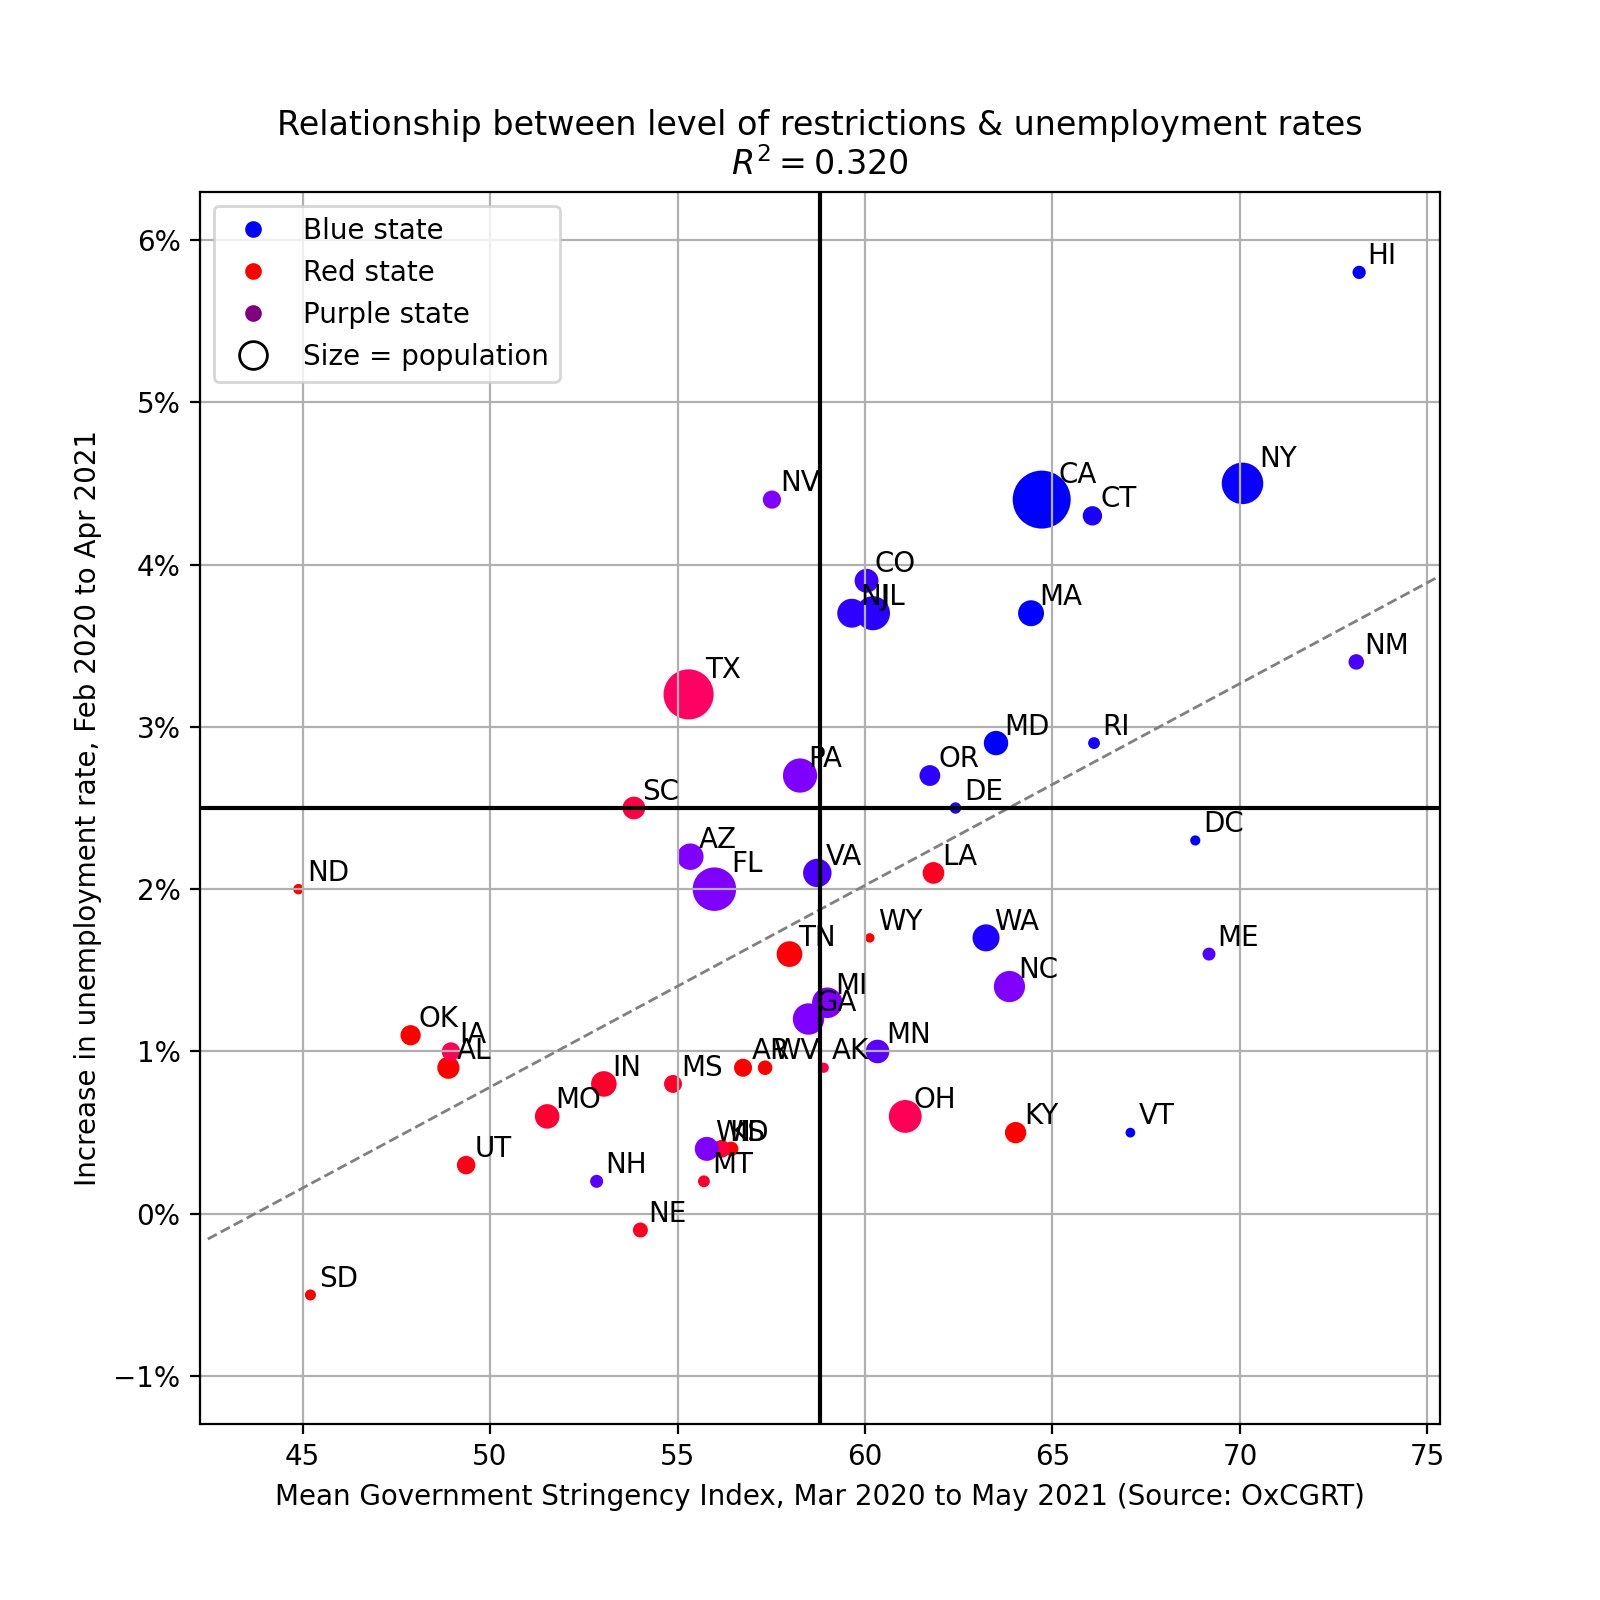

## Box Plots for Outliers

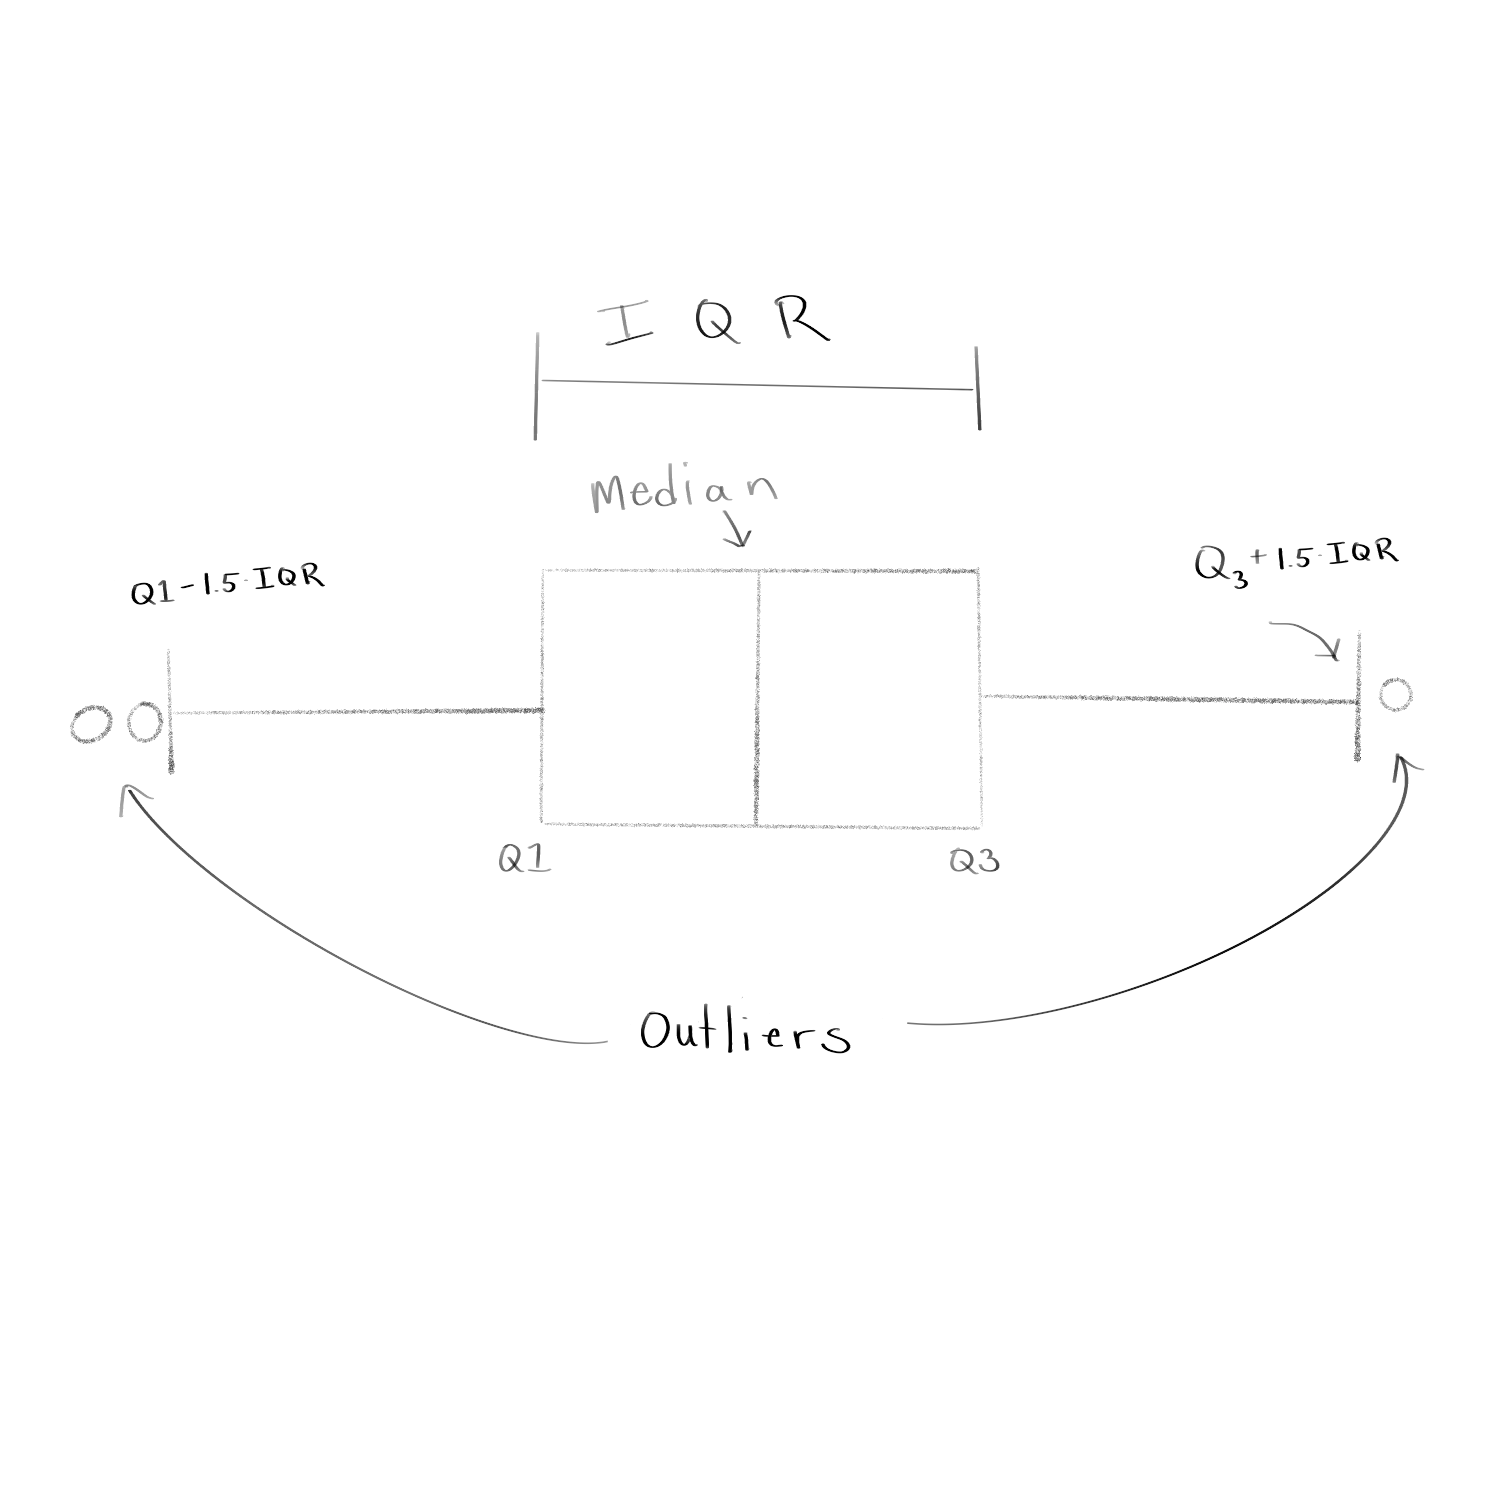

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
iris.boxplot()
plt.show()

# Exploratory Data Analysis (EDA) - Categorical Data:

In [101]:
# CA housing example
adult = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/CS180/main/data/adult.csv')

In [ ]:
adult.head()

In [ ]:
adult.info()

In [104]:
adult = adult.sample(1000)

In [ ]:
adult.head()

## Univariate Plots and Statistics


In [106]:
cnts = adult["marital-status"].value_counts()

In [ ]:
cnts

In [ ]:
#f, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x = cnts.index, y = cnts)
plt.xticks(rotation = 45)

### Bivariate Plots and Statistics

### Heat maps and conditional probabilities

In [109]:
education_levels = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters",
    "Doctorate", "Prof-school"
]


In [110]:
# Heat maps
heat = pd.crosstab(
    index=adult["education"],
    columns=adult['income'],
    normalize = "index"
)

In [ ]:
heat = heat.reindex(education_levels)
heat

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat, annot=True, linewidths=.5, ax=ax)

# In-class Programming

## Question 1: Using the adult dataset, create a scatter plot of age and hours per week. What do you observe?

Use the following code to download the adult income dataset: `# CA housing example
!curl -o adult.csv https://raw.githubusercontent.com/porterjenkins/CS180/main/data/adult.csv`

In [ ]:
!curl -o adult.csv https://raw.githubusercontent.com/porterjenkins/CS180/main/data/adult.csv

In [ ]:
adult.head()

In [ ]:
plt.scatter(adult.age, adult['hours-per-week'])
plt.show()

## Question 2: Find the most frequent the occupations, sorted highest to lowest. Create a bar chart to visualize.

In [116]:
jobs = adult["occupation"].value_counts()

In [ ]:
plt.bar(jobs.index, adult["occupation"].value_counts())
plt.xticks(rotation=45)
plt.show()

## Question 3: Find the **median** hours worked per week, by age. Create a line plot `plt.plot(x, y)` to visualize the trend.

In [118]:
med_per_age = adult[['age', 'hours-per-week']].groupby("age").median().sort_values(by='age')

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(med_per_age.index, med_per_age['hours-per-week'])
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel("Hours-per-week")
plt.show()
